# Consideraciones iniciales:
Para abordar el ejercicio, creé primero una extracción de los datos desde una carpeta publica que tengo en google drive.
[Link carpeta](https://drive.google.com/drive/folders/1uxxPGufCgLTU54hBlqVvw3QSE1-BWW8J?usp=sharing)



1. Obtengo todas las rutas disponibles y las guardo en una lista
2. Luego hago una extracción de los datos de cada archivo, contemplando que pueden iniciar desde partes distintas y tener diferente longitud.
3. Luego tomo ese dataset consolidado y creo uno con el beneficio neto.
4. Utilizo un codigo con librerías de analisis de datos y streamlit para generar analítica de la información obtenida de una forma amigable con el usuario. El repositorio en git hub es [este](https://github.com/panidas98/appBancosEstResul/tree/main) Por favor revisar allí la otra parte muy importante del despliegue que es el escript usado para graficar y analizar.
5. Y este es el servicio donde podrán ver el analisis de la información.
[Link del dashboard](https://appbancosestresul.streamlit.app/)

**Nota: los nombres del año 2020 fueron modificados 3 archivos para poder normalizar los nombres y facilitar la extracción de las fechas.

*Por favor, tener en cuenta que utilizo un ambiente gratuito de streamlit, en caso de que el servicio pueda estar caído cuando lo vayan a revisar por favor avisarme a mi número 3155520224 o a mi correo institucional juanochoa243834@correo.itm.edu.co para levantarlo inmediatamente.*

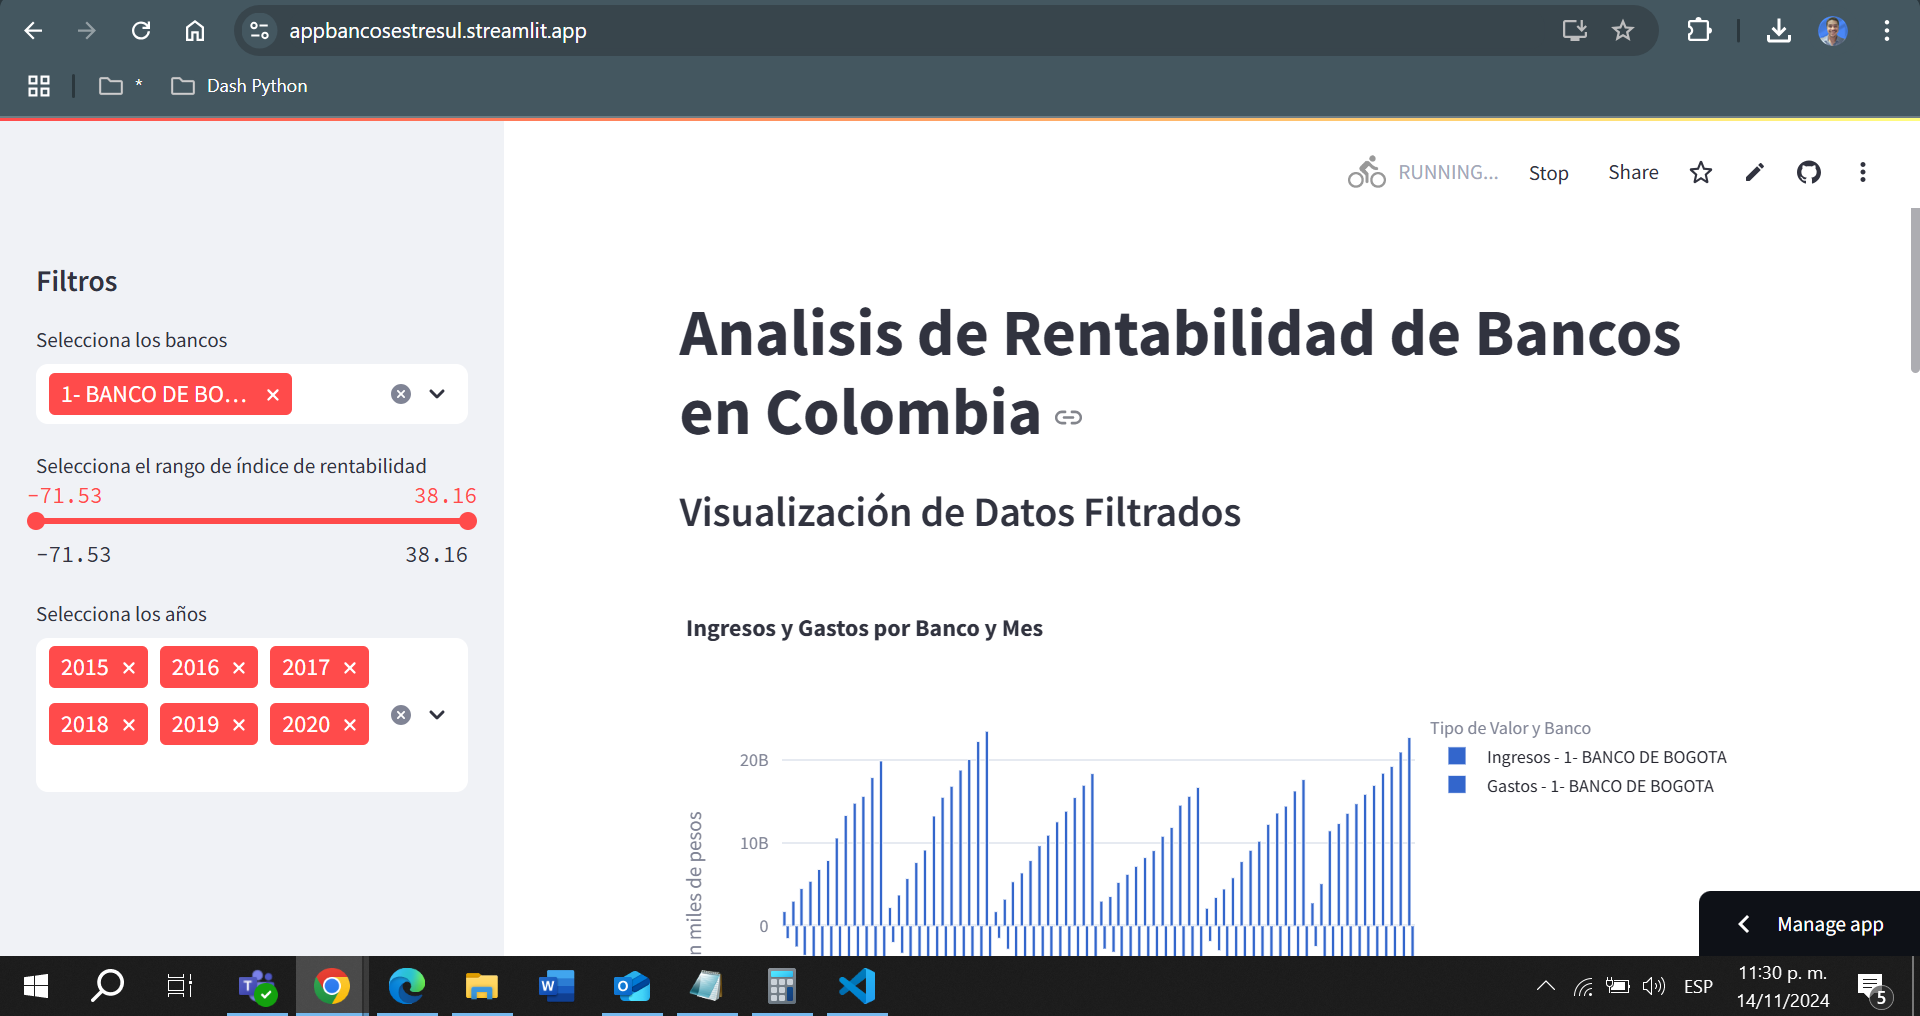



# **Obtener una lista con las rutas**

In [ ]:
from google.colab import drive
import os
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

def generar_rutas(carpeta_principal):
    """
    Genera una lista con las rutas completas de todos los archivos XLS
    dentro de la estructura de carpetas especificada
    """
    rutas = []

    # Obtener las subcarpetas
    subcarpetas = [f for f in os.listdir(carpeta_principal) if os.path.isdir(os.path.join(carpeta_principal, f))]

    # Recorrer cada subcarpeta
    for subcarpeta in subcarpetas:
        ruta_subcarpeta = os.path.join(carpeta_principal, subcarpeta)

        # Obtener archivos XLS de la subcarpeta
        archivos = [f for f in os.listdir(ruta_subcarpeta) if f.endswith('.xls')]

        # Agregar la ruta completa de cada archivo
        for archivo in archivos:
            ruta_completa = os.path.join(ruta_subcarpeta, archivo)
            rutas.append(ruta_completa)

    return rutas

# Reemplazar con la ruta de tu carpeta principal en Drive
ruta_principal = '/content/drive/My Drive/BANCOS'

# Generar la lista de rutas
lista_rutas = generar_rutas(ruta_principal)

print(f'Lista de rutas generada para {len(lista_rutas)} rutas')
print(lista_rutas)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Lista de rutas generada para 71 rutas
['/content/drive/My Drive/BANCOS/1N2020/1N60001012020n.xls', '/content/drive/My Drive/BANCOS/1N2020/1N60001052020n.xls', '/content/drive/My Drive/BANCOS/1N2020/1N60001092020n.xls', '/content/drive/My Drive/BANCOS/1N2020/1N60001102020n.xls', '/content/drive/My Drive/BANCOS/1N2020/1N60001062020n.xls', '/content/drive/My Drive/BANCOS/1N2020/1N60001072020n.xls', '/content/drive/My Drive/BANCOS/1N2020/1N60001122020n.xls', '/content/drive/My Drive/BANCOS/1N2020/1N60001042020n.xls', '/content/drive/My Drive/BANCOS/1N2020/1N60001022020n.xls', '/content/drive/My Drive/BANCOS/1N2020/1N60001082020n.xls', '/content/drive/My Drive/BANCOS/1N2020/1N60001112020n.xls', '/content/drive/My Drive/BANCOS/1N2017/1N30001052017n.xls', '/content/drive/My Drive/BANCOS/1N2017/1N30001012017n.xls', '/content/drive/My Drive/BANCOS/1N2017/1N30001042017

# Consolidar los archivos de la lista de rutas v2

In [ ]:
import pandas as pd
import re

# Diccionario para homologar nombres de bancos
homologacion_bancos = {
    '1': '1- BANCO DE BOGOTA',
    '12': '12- BANCO GNB SUDAMERIS',
    '13': '13- BBVA COLOMBIA',
    '2': '2- BANCO POPULAR',
    '23': '23- Banco  de  Occidente S.A.',
    '30': '30- BANCO CAJA SOCIAL BCSC',
    '39': '39- DAVIVIENDA S.A.',
    '42': '42- COLPATRIA RED MULTIBANCA',
    '43': '43- BANCO AGRARIO DE COLOMBIA S.A.',
    '49': '49- AV VILLAS',
    '51': '51- PROCREDIT',
    '52': '52- BANCAMIA S.A.',
    '53': '53- WWB S.A.',
    '54': '54- BANCOOMEVA',
    '55': '55- FINANDINA',
    '56': '56- BANCO FALABELLA S.A.',
    '57': '57- BANCO PICHINCHA S.A.',
    '58': '58- COOPCENTRAL',
    '59': '59- BANCO SANTANDER DE NEGOCIOS COLOMBI',
    '6': '6- BANCO CORPBANCA',
    '60': '60- BANCO MUNDO MUJER S.A',
    '61': '61- BANCO MULTIBANK',
    '62': '62- BANCO COMPARTIR S.A.',
    '7': '7- BANCOLOMBIA',
    '9': '9- CITIBANK',
    '63':'63 - BANCO SERFINANZA S.A.'
}
def homologar_columnas(columnas):
    # Función para homologar nombres de columnas basándose en el diccionario
    columnas_homologadas = []
    for col in columnas:
        # Busca el número inicial en el nombre de la columna
        match = re.match(r"(\d+)[-\s]", col)
        # print(f'Procesando columna {col},{match}')
        if match:
            # print(f'Se encontró para la columna {col} el numero {match}')
            numero = match.group(1)
            # Usa el nombre homologado si está en el diccionario, de lo contrario, mantiene el nombre original
            columnas_homologadas.append(homologacion_bancos.get(numero, col))
        else:
            columnas_homologadas.append(col)
    return columnas_homologadas

def consolidar_archivos(rutas):
    dfs = []  # Lista para almacenar todos los DataFrames
    c = 1

    for ruta in rutas:
        try:
            print(f'Procesando archivo {c} de {len(rutas)}')
            # Leer el archivo
            df = pd.read_excel(ruta)

            # Asegúrate de que 'Unnamed: 1' es una columna de texto
            df['Unnamed: 1'] = df['Unnamed: 1'].astype(str)

            # Encuentra el índice donde inicia 'ACTIVO'
            palabraClave = df[df['Unnamed: 1'].str.strip() == 'ACTIVO'].index[0]
            inicio = palabraClave - 1
            datos = df.iloc[inicio:]

            # Definir encabezados
            datos.iat[0, 0] = 'Cuenta'
            datos.iat[0, 1] = 'Descripcion'
            data = datos.reset_index(drop=True)
            data.columns = data.iloc[0]
            data = data[1:]

            # Extraer mes y año del nombre del archivo
            txt = ruta.split('/')[-1].split('.')[0][:-1][-6:]
            mes = txt[:2]
            año = txt[-4:]

            # Añadir columnas con mes y año
            data['Mes'] = mes
            data['Año'] = año

            # Homologar nombres de las columnas
            data.columns = homologar_columnas(data.columns)

            # Agregar el DataFrame a la lista
            dfs.append(data)
            print(f"Archivo procesado exitosamente: {ruta}")

            c += 1

        except Exception as e:
            print(f"Error procesando {ruta}: {str(e)}")
            c += 1

    # Concatenar todos los DataFrames
    df_final = pd.concat(dfs, axis=0, ignore_index=True)

    return df_final

# Guardar archivo final
ruta_guardado = '/content/drive/MyDrive/BANCOS/consolidado.xlsx'
df_consolidado = consolidar_archivos(rutas=lista_rutas)
df_consolidado.to_excel(ruta_guardado, index=False)
print(f"Archivo consolidado guardado en: {ruta_guardado}")

Procesando archivo 1 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2020/1N60001012020n.xls
Procesando archivo 2 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2020/1N60001052020n.xls
Procesando archivo 3 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2020/1N60001092020n.xls
Procesando archivo 4 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2020/1N60001102020n.xls
Procesando archivo 5 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2020/1N60001062020n.xls
Procesando archivo 6 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2020/1N60001072020n.xls
Procesando archivo 7 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2020/1N60001122020n.xls
Procesando archivo 8 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2020/1N60001042020n.xls
Procesando archivo 9 de 71
Archivo procesado exitosamente: /content/driv

<ipython-input-2-7eed84cc9f07>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mes'] = mes
<ipython-input-2-7eed84cc9f07>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Año'] = año


Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1C2015/1N10001102015n.xls
Procesando archivo 46 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1C2015/1N10001112015n.xls
Procesando archivo 47 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1C2015/1N10001122015n.xls
Procesando archivo 48 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2016/1N20001022016n.xls
Procesando archivo 49 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2016/1N20001012016n.xls
Procesando archivo 50 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2016/1N20001032016n.xls
Procesando archivo 51 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2016/1N20001082016n.xls
Procesando archivo 52 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1N2016/1N20001092016n.xls
Procesando archivo 53 de 71
Archivo procesado exitosamente: /content/drive/My Drive/BANCOS/1

# Beneficio Neto

In [ ]:
import numpy as np

# Para simplificar, las cuentas se categorizan según su número inicial:
def categorizar_cuenta(cuenta):
    if str(cuenta).startswith(('400000')):
        return 'Ingreso'
    elif str(cuenta).startswith(('510000')):
        return 'Gasto'
    elif str(cuenta).startswith(('100000')):
        return 'Activo'
    elif str(cuenta).startswith(('200000')):
        return 'Pasivo'
    else:
        return 'Otro'

# Filtrar solo las cuentas padre específicas
cuentas_padre = ['100000', '200000', '400000', '510000']
df_consolidado = df_consolidado[df_consolidado['Cuenta'].astype(str).isin(cuentas_padre)]

# Aplicar la categorización a la columna 'Cuenta'
df_consolidado['Categoria'] = df_consolidado['Cuenta'].apply(categorizar_cuenta)
print('Categorización de cuentas realizada')
# print(df_consolidado.head())

# Agrupar por banco, Año y Mes
# Primero, vamos a pivotar el DataFrame para tener los valores de cada banco como columnas
df_pivot = df_consolidado.melt(id_vars=['Cuenta', 'Descripcion', 'Mes', 'Año', 'Categoria'],
                   value_vars=[col for col in df_consolidado.columns if col not in ['Cuenta', 'Descripcion', 'Mes', 'Año', 'Categoria']],
                   var_name='Banco', value_name='Valor')

# print(df_pivot.head(1000))

# Ahora vamos a separar los ingresos y gastos
ingresos_df = df_pivot[df_pivot['Categoria'] == 'Ingreso']
gastos_df = df_pivot[df_pivot['Categoria'] == 'Gasto']

# Ahora vamos a separar los activos y pasivos
activo_df = df_pivot[df_pivot['Categoria'] == 'Activo']
pasivo_df = df_pivot[df_pivot['Categoria'] == 'Pasivo']

# Sumar ingresos y gastos por banco, mes y año
ingresos_totales = ingresos_df.groupby(['Banco', 'Mes', 'Año'])['Valor'].sum().reset_index()
gastos_totales = gastos_df.groupby(['Banco', 'Mes', 'Año'])['Valor'].sum().reset_index()

# Sumar activos y pasivos por banco, mes y año
activos_totales = activo_df.groupby(['Banco', 'Mes', 'Año'])['Valor'].sum().reset_index()
pasivos_totales = pasivo_df.groupby(['Banco', 'Mes', 'Año'])['Valor'].sum().reset_index()

# Unir ingresos y gastos para calcular el beneficio neto
beneficio_neto_df = pd.merge(ingresos_totales, gastos_totales, on=['Banco', 'Mes', 'Año'], how='outer', suffixes=('_Ingreso', '_Gasto'))

# Unir activos y pasivos para calcular el capital total
capital_neto_df = pd.merge(activos_totales, pasivos_totales, on=['Banco', 'Mes', 'Año'], how='outer', suffixes=('_activos', '_pasivos'))

# Calcular el beneficio neto (ingresos - gastos)
beneficio_neto_df['Beneficio Neto'] = beneficio_neto_df['Valor_Ingreso'] - beneficio_neto_df['Valor_Gasto']
beneficio_neto_df = beneficio_neto_df[beneficio_neto_df['Banco'] != 'TOTAL']

# Calcular el capital total (activos - pasivos)
capital_neto_df['Capital Neto'] = capital_neto_df['Valor_activos'] - capital_neto_df['Valor_pasivos']
capital_neto_df = capital_neto_df[capital_neto_df['Banco'] != 'TOTAL']

print(capital_neto_df)
print('Variables calculadas')

# Ahora unimos los dos DataFrames
df_consolidado_final = pd.merge(
    beneficio_neto_df,
    capital_neto_df[['Banco', 'Mes', 'Año', 'Capital Neto','Valor_activos','Valor_pasivos']],  # Solo seleccionamos las columnas que necesitamos
    on=['Banco', 'Mes', 'Año'],
    how='outer'
)

# Ordenamos el DataFrame por Banco, Año y Mes
df_consolidado_final = df_consolidado_final.sort_values(['Banco', 'Año', 'Mes'])

# Asegurarse de que las columnas sean numéricas
df_consolidado_final['Capital Neto'] = pd.to_numeric(df_consolidado_final['Capital Neto'], errors='coerce')
df_consolidado_final['Beneficio Neto'] = pd.to_numeric(df_consolidado_final['Beneficio Neto'], errors='coerce')

# Filtrar las filas donde 'Capital Neto' no sea 0
df_consolidado_final = df_consolidado_final[df_consolidado_final['Capital Neto'] != 0]

# Ahora calculamos el índice de rentabilidad
df_consolidado_final['indiceRentabilidad'] = np.where(
    (df_consolidado_final['Capital Neto'] == 0) | df_consolidado_final['Capital Neto'].isna(),  # Verifica si es 0 o NaN
    np.nan,  # Asigna NaN si el denominador es cero o NaN
    (df_consolidado_final['Beneficio Neto'] / df_consolidado_final['Capital Neto']) * 100  # Realiza el cálculo
)

# Remplazar NaN por 0
df_consolidado_final['indiceRentabilidad'].fillna(0, inplace=True)

# Guardamos el nuevo DataFrame consolidado
df_consolidado_final.to_excel(f'{ruta_guardado}consolidadoFinal.xlsx', index=False)
print(f"Archivo consolidado final guardado en: {ruta_guardado}")

<ipython-input-3-742c770a1229>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consolidado['Categoria'] = df_consolidado['Cuenta'].apply(categorizar_cuenta)
<ipython-input-3-742c770a1229>:92: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_consolidado_final['indiceRentabilidad'].fi

Categorización de cuentas realizada
                   Banco Mes   Año       Valor_activos       Valor_pasivos  \
0     1- BANCO DE BOGOTA  01  2015  67499590971.330002       54241184656.5   
1     1- BANCO DE BOGOTA  01  2016  76951913280.539993      61047149722.82   
2     1- BANCO DE BOGOTA  01  2017  80353441448.610001  64253488475.209999   
3     1- BANCO DE BOGOTA  01  2018  82557767627.139999  65890062856.279999   
4     1- BANCO DE BOGOTA  01  2019  87207692500.110001  68860766904.100006   
...                  ...  ..   ...                 ...                 ...   
1867         9- CITIBANK  12  2016  10665852197.309999       8770333764.48   
1868         9- CITIBANK  12  2017  11869308986.190001  10250542551.559999   
1869         9- CITIBANK  12  2018       8431419362.77        6634067155.9   
1870         9- CITIBANK  12  2019   8711162033.889999       6959572091.82   
1871         9- CITIBANK  12  2020      10313671529.93       8425331354.34   

            Capital Neto  


# Generar código QR:

In [ ]:
# Instalar la librería necesaria para el QR
!pip install qrcode[pil]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.5 MB/s eta 0:00:00


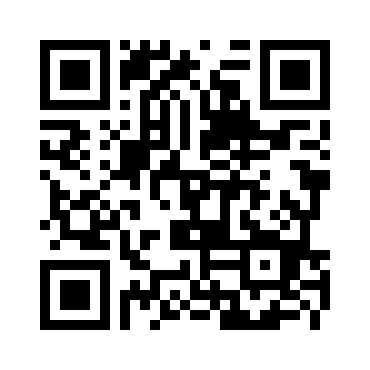

In [ ]:
# Importar las librerías
import qrcode
from IPython.display import Image, display

# URL que deseas convertir en QR
url = "https://appbancosestresul.streamlit.app/"

# Generar el código QR
qr = qrcode.QRCode(
    version=1,  # Tamaño del código QR
    error_correction=qrcode.constants.ERROR_CORRECT_L,  # Nivel de corrección de errores
    box_size=10,  # Tamaño de cada "caja" del código QR
    border=4,  # Tamaño del borde
)
qr.add_data(url)
qr.make(fit=True)

# Crear la imagen del QR
img = qr.make_image(fill_color="black", back_color="white")

# Mostrar el QR directamente en el notebook
img.save("qr_code.png")
display(Image("qr_code.png"))